In [ ]:
# Sport Celebrity Image Classification: Data Cleaning


In [ ]:
!pip install PyWavelets

In [ ]:
!pip install opencv-python

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
from skimage import io
%matplotlib inline

In [23]:
img= cv2.imread("C:/Users/Salaudeen Ibrahim/Documents/Untitled Folder 1/Untitled Folder/Dataset/Diogo Dialot portrait - Google Search/f.jpeg")

In [24]:
img.shape

(2133, 3200, 3)

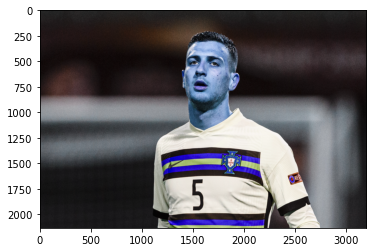

In [25]:
plt.imshow(img)

In [26]:
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(2133, 3200)

In [27]:
gray

array([[32, 35, 42, ..., 58, 58, 52],
       [32, 33, 37, ..., 59, 53, 49],
       [35, 35, 35, ..., 47, 39, 41],
       ...,
       [22, 27, 28, ..., 32, 34, 34],
       [21, 25, 26, ..., 30, 32, 32],
       [23, 25, 24, ..., 29, 30, 30]], dtype=uint8)

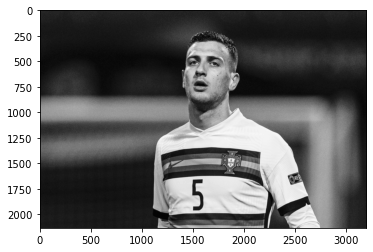

In [28]:
plt.imshow(gray, cmap='gray')

In [29]:
face_cascade = cv2.CascadeClassifier('C:/Users/Salaudeen Ibrahim/Documents/Untitled Folder 1/Untitled Folder/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/Salaudeen Ibrahim/Documents/Untitled Folder 1/Untitled Folder/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[1313,  284,  567,  567]])

In [30]:
(x,y,w,h) = faces[0]
x,y,w,h

(1313, 284, 567, 567)

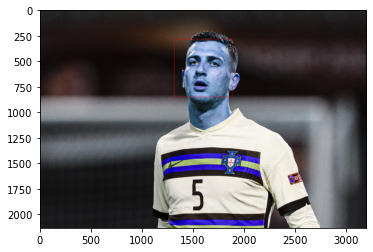

In [32]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

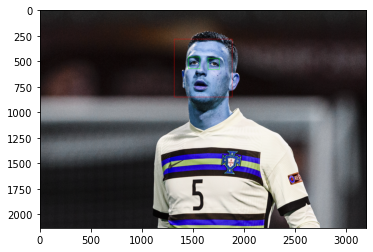

In [33]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

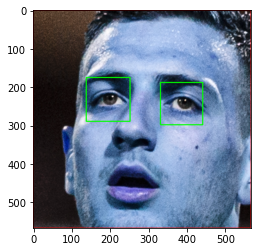

In [34]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [35]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [36]:
original_image =cv2.imread("C:/Users/Salaudeen Ibrahim/Documents/Untitled Folder 1/Untitled Folder/Dataset/aaron_ramsdale/i.jpg")

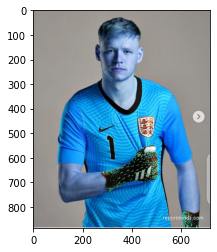

In [15]:
plt.imshow(original_image
          )

In [38]:
path_to_data ='./Dataset/'
path_to_cr_data ='./Dataset/a/'

In [39]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [40]:
img_dirs

['./Dataset/a',
 './Dataset/david de gea portrait - Google Search',
 './Dataset/Dean Henderson portrait man u - Google Search',
 './Dataset/Diogo Dialot portrait - Google Search',
 './Dataset/Eric Baily portrait man u - Google Search',
 './Dataset/harry macquire portrait man u - Google Search',
 './Dataset/lee grant portrait man u - Google Search',
 './Dataset/phil jones portrait man u - Google Search',
 './Dataset/raphael varane portrait - Google Search',
 './Dataset/tom heaton portrait man u - Google Search',
 './Dataset/Victor lindolf portrait man u - Google Search']

In [41]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [42]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    
  

a
david de gea portrait - Google Search
Generating cropped images in folder:  ./Dataset/a/david de gea portrait - Google Search
Dean Henderson portrait man u - Google Search
Generating cropped images in folder:  ./Dataset/a/Dean Henderson portrait man u - Google Search
Diogo Dialot portrait - Google Search
Generating cropped images in folder:  ./Dataset/a/Diogo Dialot portrait - Google Search
Eric Baily portrait man u - Google Search
Generating cropped images in folder:  ./Dataset/a/Eric Baily portrait man u - Google Search
harry macquire portrait man u - Google Search
Generating cropped images in folder:  ./Dataset/a/harry macquire portrait man u - Google Search
lee grant portrait man u - Google Search
Generating cropped images in folder:  ./Dataset/a/lee grant portrait man u - Google Search
phil jones portrait man u - Google Search
Generating cropped images in folder:  ./Dataset/a/phil jones portrait man u - Google Search
raphael varane portrait - Google Search
Generating cropped ima

In [43]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'david de gea portrait - Google Search': ['./Dataset/a/david de gea portrait - Google Search\\david de gea portrait - Google Search1.png',
  './Dataset/a/david de gea portrait - Google Search\\david de gea portrait - Google Search10.png',
  './Dataset/a/david de gea portrait - Google Search\\david de gea portrait - Google Search11.png',
  './Dataset/a/david de gea portrait - Google Search\\david de gea portrait - Google Search12.png',
  './Dataset/a/david de gea portrait - Google Search\\david de gea portrait - Google Search13.png',
  './Dataset/a/david de gea portrait - Google Search\\david de gea portrait - Google Search14.png',
  './Dataset/a/david de gea portrait - Google Search\\david de gea portrait - Google Search15.png',
  './Dataset/a/david de gea portrait - Google Search\\david de gea portrait - Google Search16.png',
  './Dataset/a/david de gea portrait - Google Search\\david de gea portrait - Google Search18.png',
  './Dataset/a/david de gea portrait - Google Search\\david 

In [44]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'david de gea portrait - Google Search': 0,
 'Dean Henderson portrait man u - Google Search': 1,
 'Diogo Dialot portrait - Google Search': 2,
 'Eric Baily portrait man u - Google Search': 3,
 'harry macquire portrait man u - Google Search': 4,
 'lee grant portrait man u - Google Search': 5,
 'phil jones portrait man u - Google Search': 6,
 'raphael varane portrait - Google Search': 7,
 'tom heaton portrait man u - Google Search': 8,
 'Victor lindolf portrait man u - Google Search': 9}

In [45]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [46]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [47]:
len(X[0])

4096

In [51]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(453, 4096)

In [52]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6403508771929824

In [53]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.50      0.33      0.40        12
           2       0.64      0.50      0.56        14
           3       1.00      1.00      1.00         7
           4       0.65      0.94      0.77        18
           5       0.86      0.75      0.80         8
           6       0.25      0.38      0.30         8
           7       0.73      0.79      0.76        14
           8       0.20      0.29      0.24         7
           9       0.86      0.55      0.67        11

    accuracy                           0.64       114
   macro avg       0.66      0.62      0.63       114
weighted avg       0.68      0.64      0.64       114



In [54]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [55]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [56]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.701756,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.356716,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.710711,{'logisticregression__C': 1}


In [57]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [58]:
best_estimators['svm'].score(X_test,y_test)

0.6929824561403509

In [59]:
best_estimators['random_forest'].score(X_test,y_test)

0.40350877192982454

In [60]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6491228070175439

In [61]:
best_clf = best_estimators['logistic_regression']

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 9,  1,  2,  0,  0,  0,  3,  0,  0,  0],
       [ 2,  5,  0,  0,  0,  1,  2,  0,  2,  0],
       [ 2,  0,  9,  0,  1,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  5,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  2,  0, 15,  0,  1,  0,  0,  0],
       [ 2,  0,  1,  0,  0,  5,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  5,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  0,  1,  0,  0,  2,  2,  0,  2,  0],
       [ 0,  1,  0,  0,  3,  0,  0,  2,  0,  5]], dtype=int64)

Text(69.0, 0.5, 'Truth')

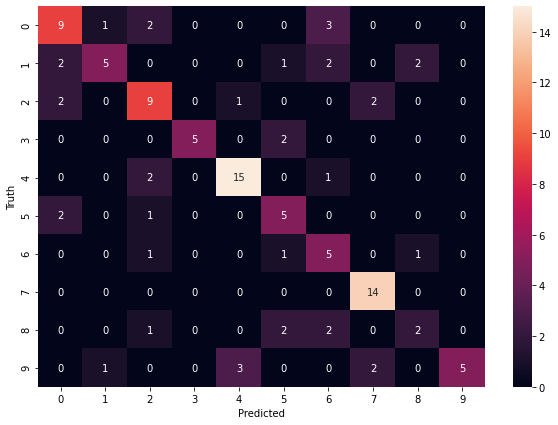

In [63]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')